In [10]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
# import ensemble methods
from sklearn.ensemble import AdaBoostClassifier, StackingClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from xgboost import XGBClassifier
# import base estimators
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import  OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
from IPython.display import display
from sklearn.metrics import plot_confusion_matrix

In [3]:
import pandas as pd

df = pd.read_csv('conversion_data_train.csv')
print('(columns, rows) of dataset:', df.shape)

(columns, rows) of dataset: (284580, 6)


In [4]:
df.head()

country  age  new_user  source  total_pages_visited  converted
0    China   22         1  Direct                    2          0
1       UK   21         1     Ads                    3          0
2  Germany   20         0     Seo                   14          1
3       US   23         1     Seo                    3          0
4       US   28         1  Direct                    3          0

In [6]:
# Checking missing values
def missing_values(df,norows):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = ((df.isnull().sum().sort_values(ascending=False)/df.shape[0])*100).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent_Missing'])
    return missing_data.head(norows)

missing_values(df,20)

Total  Percent_Missing
country                  0              0.0
age                      0              0.0
new_user                 0              0.0
source                   0              0.0
total_pages_visited      0              0.0
converted                0              0.0

In [34]:
display(df.describe(include='all'))

country           age      new_user source  total_pages_visited  \
count    10000  10000.000000  10000.000000  10000         10000.000000   
unique       4           NaN           NaN      3                  NaN   
top         US           NaN           NaN    Seo                  NaN   
freq      5640           NaN           NaN   4959                  NaN   
mean       NaN     30.504800      0.682400    NaN             4.908300   
std        NaN      8.225445      0.465566    NaN             3.403829   
min        NaN     17.000000      0.000000    NaN             1.000000   
25%        NaN     24.000000      0.000000    NaN             2.000000   
50%        NaN     30.000000      1.000000    NaN             4.000000   
75%        NaN     36.000000      1.000000    NaN             7.000000   
max        NaN     65.000000      1.000000    NaN            26.000000   

           converted  
count   10000.000000  
unique           NaN  
top              NaN  
freq             NaN  
mean        0.035300  
std         0.184546  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000

In [38]:
# create boxplots of numerical features
fig = make_subplots(rows=2, cols=2, subplot_titles=('age', 'total_pages_visited', 'source'))
fig.add_trace(go.Box(y=df['age'], name='age'), row=1, col=1)
fig.add_trace(go.Box(y=df['total_pages_visited'], name='total_pages_visited'), row=1, col=2)
fig.add_trace(go.Box(y=df['source'], name='source'), row=2, col=2)
fig.update_layout(height=600, width=800, title_text="Boxplots of numerical features")

In [14]:
df = df.sample(10000).copy()

In [42]:
fig = px.histogram(df, x="country", color="converted", barmode="group")
fig.show()

In [40]:
# sns.displot(df['age'], kde=True, bins=10)

# create  a grid of displots for each feature except "converted"
# fig = make_subplots(rows=3, cols=3, subplot_titles=df.columns[:-1])

fig = make_subplots(rows=3, cols=3, subplot_titles=df.columns)
for i, col in enumerate(df.columns):
    fig.add_trace(
        go.Histogram(x=df[col], name=col), row=i // 3 + 1, col= i % 3 + 1,
        # add proportion for each bin
            )
fig.update_layout(height=1000, width=1000, title_text="Distribution of all features")
fig.show()

In [21]:
# make displots of features distribution
def plot_displots(df, features):
    for feature in features:
        fig = px.scatter(df, x=feature)
        fig.show()
plot_displots(df, df.columns)



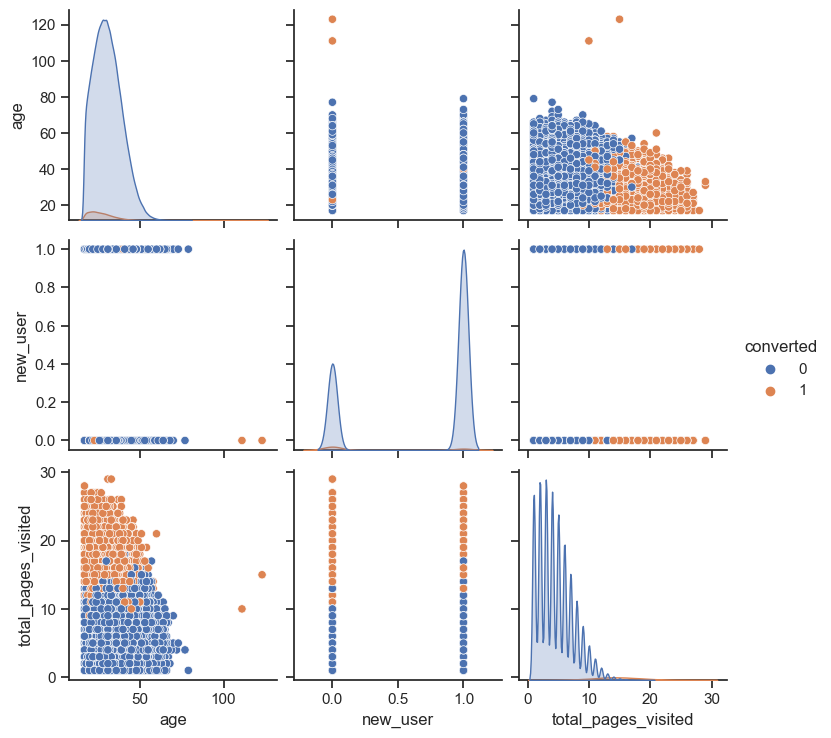

In [8]:
df = df.sample(10000).copy()

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", color_codes=True)
sns.pairplot(df, hue="converted")


In [13]:
#repartition des conversion rate par new user:
plt.figure(figsize=[12,5])
sns.countplot(df['converted'], hue = df['new_user']).set(title='Part of conversion per new user')


sns.relplot(data=df, x="total_pages_visited", y="converted")

# Univariate analysis
#Distribution of quantitative variables

from plotly.subplots import make_subplots

# Distribution of each numeric variable
num_features = ['age','total_pages_visited']
fig1 = make_subplots(rows = len(num_features), cols = 1, subplot_titles = num_features)
for i in range(len(num_features)):
    fig1.add_trace(
        go.Histogram(
            x = df[num_features[i]], nbinsx = 4),
        row = i + 1,
        col = 1)
fig1.update_layout(
        title = go.layout.Title(text = "Distribution of quantitative variables", x = 0.5), showlegend = False,
            autosize=False, height=500)
fig1.show()


# Univariate analysis

# Barplot of each qualitative variable

cat_features = ['country','new_user','source','converted']
fig2 = make_subplots(rows = len(cat_features), cols = 1, subplot_titles = cat_features)
for i in range(len(cat_features)):

    x_coords = df[cat_features[i]].value_counts().index.tolist()
    y_coords = df[cat_features[i]].value_counts().tolist()

    fig2.add_trace(
        go.Bar(
            x = x_coords,
            y = y_coords),
        row = i + 1,
        col = 1)
fig2.update_layout(
        title = go.layout.Title(text = "Barplot of qualitative variables", x = 0.5), showlegend = False,
            autosize=False, height=500)
fig2.show()

ValueError: Cannot use `hue` without `x` and `y`

<Figure size 1200x500 with 0 Axes>

<AxesSubplot: xlabel='converted', ylabel='count'>

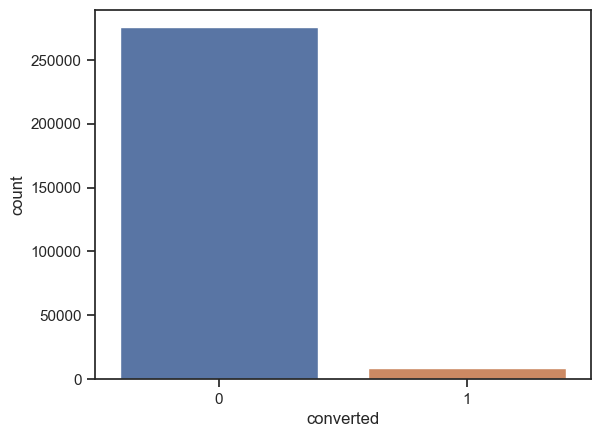

In [9]:
# Check the distribution of the target variable
sns.countplot(x='converted', data=df)

In [ ]:

mask = data["age"] < 80
data = data[mask]

features_list = ['country', 'age', 'new_user', 'source', 'total_pages_visited']
target_variable = 'converted'
numeric_indices = [1,3]
categorical_indices = [0,2]

X = data.loc[:, features_list]
Y = data.loc[:, target_variable]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=0, stratify=Y)

numeric_features = ['age', 'total_pages_visited']  # Names of numeric columns in X_train/X_test

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  # standardization
])

categorical_features = ['country', 'new_user', 'source']  # Names of categorical columns in X_train/X_test
categorical_transformer = Pipeline(
    steps=[
        ('encoder', OneHotEncoder(drop='first'))
        # first column will be dropped to avoid creating correlations between features
    ])

# Use ColumnTransformer to make a preprocessor object that describes all the treatments to be done
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [ ]:
from sklearn.linear_model import SGDClassifier

print("Grid search...")

sgdc = SGDClassifier()

params = {
    #'alpha': [0.0000000000000001],
    # 'alpha' : [0.00000000001],
    'alpha': [0.00000000001, 0.000000000000000001],
    #'learning_rate': ['adaptive'],
    'loss': ['squared_hinge', 'hinge'],
    'average' : [True],
    'penalty' : ['l2'],
    'epsilon' : [1, 1.5],
    'max_iter': [100000],
    #'eta0': [0.5],
    'early_stopping': [True],
}
while True:
    gridsearch_sgdc = GridSearchCV(sgdc, param_grid=params, cv=5, scoring="f1")
                                      # verbose=True)  # cv : the number of folds to be used for CV
    gridsearch_sgdc.fit(X_train, Y_train)
    print("...Done.")

    print("Accuracy on training set : ", gridsearch_sgdc.score(X_train, Y_train))
    print("Accuracy on test set : ", gridsearch_sgdc.score(X_test, Y_test))

    # Predictions on training set
    Y_train_pred = gridsearch_sgdc.predict(X_train)
    Y_test_pred = gridsearch_sgdc.predict(X_test)

    print("Best hyperparameters : ", gridsearch_sgdc.best_params_)
    print("Best validation accuracy : ", gridsearch_sgdc.best_score_)

    print("f1-score on train set : ", f1_score(Y_train, Y_train_pred))
    print("f1-score on test set : ", f1_score(Y_test, Y_test_pred))
    # f1-score on train set :  0.7678455758517944
    # f1-score on test set :  0.769855072463768

    # Concatenate our train and test set to train your best classifier on all data with labels
    X = np.append(X_train, X_test, axis=0)
    Y = np.append(Y_train, Y_test)

    gridsearch_sgdc.best_estimator_.fit(X, Y)

    pred = gridsearch_sgdc.best_estimator_.predict(X)
    print("f1-score on set : ", f1_score(Y, pred))
    a1 = f1_score(Y_train, Y_train_pred)
    a2 = f1_score(Y_test, Y_test_pred)
    a3 = f1_score(Y, pred)

    with open("gridsearch.txt", "a") as f:
        f.write("f1-score on train set : " + str(a1) + "\n")
        f.write("f1-score on test set : " + str(a2) + "\n")
        f.write("f1-score on set : " + str(a3) + "\n")
        f.write("Best hyperparameters : " + str(gridsearch_sgdc.best_params_) + "\n")
        f.write("Best validation accuracy : " + str(gridsearch_sgdc.best_score_) + "\n")
        f.write("Accuracy on training set : " + str(gridsearch_sgdc.score(X_train, Y_train)) + "\n")
        f.write("Accuracy on test set : " + str(gridsearch_sgdc.score(X_test, Y_test)) + "\n")
        f.write("---------------------")

    if a1 > 0.77 and a2 > 0.77 and a3 > 0.77:
        break

In [ ]:
print(params)

In [ ]:
print(params)

# Train best classifier on all data and use it to make predictions on X_without_labels
**Before making predictions on the file conversion_data_test.csv, let's train our model on ALL the data that was in conversion_data_train.csv. Sometimes, this allows to make tiny improvements in the score because we're using more examples to train the model.**

In [ ]:
# Concatenate our train and test set to train your best classifier on all data with labels
X = np.append(X_train, X_test, axis=0)
Y = np.append(Y_train, Y_test)

gridsearch_sgdc.fit(X, Y)

In [ ]:
pred = gridsearch_sgdc.predict(X)
print("f1-score on set : ", f1_score(Y, pred))

In [ ]:
# Read data without labels
data_without_labels = pd.read_csv('conversion_data_test.csv')
print('Prediction set (without labels) :', data_without_labels.shape)

# Warning : check consistency of features_list (must be the same than the features 
# used by your best classifier)
features_list = ['country', 'age', 'new_user', 'source', 'total_pages_visited']
X_without_labels = data_without_labels.loc[:, features_list]

In [ ]:
# WARNING : PUT HERE THE SAME PREPROCESSING AS FOR YOUR TEST SET
# CHECK YOU ARE USING X_without_labels
print("Encoding categorical features and standardizing numerical features...")

X_without_labels = preprocessor.transform(X_without_labels)
print("...Done")
print(X_without_labels[0:5, :])

In [10]:
# WARNING : PUT HERE THE SAME PREPROCESSING AS FOR YOUR TEST SET
# CHECK YOU ARE USING X_without_labels
print("Encoding categorical features and standardizing numerical features...")

X_without_labels = preprocessor.transform(X_without_labels)
print("...Done")
print(X_without_labels[0:5, :])

Encoding categorical features and standardizing numerical features...
...Done
[[-0.31000438  3.33049128  0.          1.          0.          0.
   0.          1.        ]
 [-1.03592414  0.03829244  0.          1.          0.          1.
   1.          0.        ]
 [ 0.17394213 -1.15887077  0.          0.          0.          1.
   0.          1.        ]
 [ 0.17394213  0.33758325  0.          0.          1.          1.
   0.          0.        ]
 [-0.67296426 -0.56028917  0.          0.          0.          0.
   0.          1.        ]]


In [11]:
# Make predictions and dump to file
# WARNING : MAKE SURE THE FILE IS A CSV WITH ONE COLUMN NAMED 'converted' AND NO INDEX !
# WARNING : FILE NAME MUST HAVE FORMAT 'conversion_data_test_predictions_[name].csv'
# where [name] is the name of your team/model separated by a '-'
# For example : [name] = AURELIE-model1
import datetime
data = {
    'converted': gridsearch_sgdc.predict(X_without_labels)
}

Y_predictions = pd.DataFrame(columns=['converted'], data=data)
Y_predictions.to_csv(f'conversion_data_test_predictions_LV-{datetime.datetime.now().timestamp()}.csv', index=False)
